# Time Entry for CSE Utilization

### Please create a utilization folder and place this file in there.
#### If this is your first time running this app. Please head to the bottom of the app and start with cell 18.

### Use the code snippets below to insert the recorded time in the Database.

In [54]:
%run -i util.py -d "2018-08-03" -t 30 -de "Admin Time - PP"

[(1, '2018-07-30', 60, 'Admin Time'), (2, '2018-07-30', 120, 'Community Time - Assist with Bot'), (3, '2018-07-31', 30, 'Admin Time - Coffee'), (4, '2018-07-31', 15, 'Admin Time'), (5, '2018-07-31', 30, 'CSU - Summer Tech Camp'), (6, '2018-07-31', 15, 'Team Time - Chat w/ Pete'), (7, '2018-07-31', 15, 'Team Time - Chat w/ Cailin'), (8, '2018-07-31', 30, 'Admin Time - PP'), (9, '2018-07-31', 15, 'Admin Time - PP'), (10, '2018-07-31', 30, 'Admin Time - 1 on 1 w/ Cara Immel'), (11, '2018-08-01', 30, 'Admin Time - Coffee'), (12, '2018-08-01', 60, 'Team Time - Social'), (13, '2018-08-01', 15, 'Admin Time - PP'), (14, '2018-08-01', 15, 'CS Stand Up'), (15, '2018-08-01', 60, 'Customer Success Tech Exchange'), (16, '2018-08-01', 30, 'Admin Time - Research'), (17, '2018-08-02', 15, 'Admin Time - Coffee'), (18, '2018-08-02', 30, 'Admin Time - Research'), (19, '2018-08-02', 60, 'CS Weekly Call'), (20, '2018-08-02', 30, 'Admin Time - Research'), (21, '2018-08-03', 30, 'Admin Time - Coffee'), (22, 

<Figure size 432x288 with 0 Axes>

### Summarize the data in the database for Viewing purposes

In [2]:
%run -i util.py -s "sum"

### View DataFrame

In [40]:
filterVal = 0

In [41]:
import pandas as pd
import arrow

if filterVal:
    
    df = pd.read_csv("files/metrics.csv")
    date_today = arrow.now().format('YYYY-MM-DD')
    df = df[df["Dates"] == date_today]
    print(df)

else:
    df = pd.read_csv("files/metrics.csv")
    print(df)

    

    id       Dates  total_time                  label_description
0    1  2018-07-30          60                         Admin Time
1    2  2018-07-30         120   Community Time - Assist with Bot
2    3  2018-07-31          30                Admin Time - Coffee
3    4  2018-07-31          15                         Admin Time
4    5  2018-07-31          30             CSU - Summer Tech Camp
5    6  2018-07-31          15           Team Time - Chat w/ Pete
6    7  2018-07-31          15         Team Time - Chat w/ Cailin
7    8  2018-07-31          30                    Admin Time - PP
8    9  2018-07-31          15                    Admin Time - PP
9   10  2018-07-31          30  Admin Time - 1 on 1 w/ Cara Immel
10  11  2018-08-01          30                Admin Time - Coffee
11  12  2018-08-01          60                 Team Time - Social
12  13  2018-08-01          15                    Admin Time - PP
13  14  2018-08-01          15                        CS Stand Up
14  15  20

### Group the data in the Dataframe

In [50]:
groupedval = 0

In [51]:
if groupedval:
    ## Represents grouping by Dates
    groupdf =df.groupby(['Dates','label_description'])['total_time'].sum()
else:
    ## represents grouping by Label Description
    groupdf =df.groupby(['label_description'])['total_time'].sum()

### Graphical View of Data

                    label_description  total_time
5                         CS Stand Up          15
10         Team Time - Chat w/ Cailin          15
11           Team Time - Chat w/ Pete          15
1   Admin Time - 1 on 1 w/ Cara Immel          30
7              CSU - Summer Tech Camp          30
3                     Admin Time - PP          60
6                      CS Weekly Call          60
9      Customer Success Tech Exchange          60
12                 Team Time - Social          60
0                          Admin Time          75
4               Admin Time - Research          90
2                 Admin Time - Coffee         105
8    Community Time - Assist with Bot         120


<Figure size 432x288 with 0 Axes>

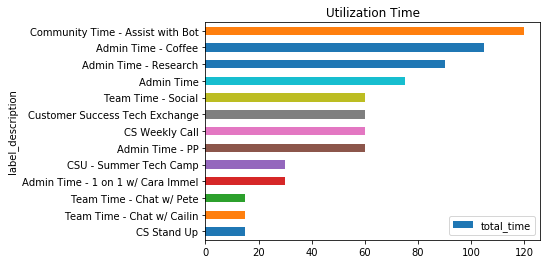

In [57]:
%matplotlib inline
import matplotlib.pyplot as plt

cleandf = groupdf.reset_index()
clean_df = cleandf[["label_description", "total_time"]].sort_values(by=['total_time'], ascending=True)

plt.figure(); clean_df.plot.barh(x='label_description', y='total_time', title="Utilization Time");

### Total Hours worked

In [53]:
df['total_time'].sum() / 60

12.25

### Backup the Database

In [12]:
%run -i util.py -s "sum" -b "bk"


Creating E:/utilization/backups/backup_db\utilization-2018-07-30...

------------------------------

Creating E:/utilization/production/files\Final_Metrics_2018-07-30.csv



### Remove a row from the Database

In [3]:
%run -i util.py -r 17

### Clear the database and Save the data to a backup database

In [13]:
%run -i util.py -dr "Drop" -c "Create"

[(1, None, None, None)]


# Steps for creating the necessary files and directories to run this App

In [18]:
## Edit the E drive path with the drive path you create 
## the utlization folder in.  
import sys
sys.path.append("E:/utilization/TaskManager")

### Create folders and directories for this App (Need to be in the utilization folder directory for these commands to work)

In [17]:
!mkdir ..\TaskManager
!mkdir ..\TaskManager\files
!mkdir ..\backups
!mkdir ..\backups\backup_db
!mkdir ..\backups\backup_files
!mkdir ..\TaskManager\logger

### Create the requirements.txt file

In [50]:
%%file requirments.txt
appJar==0.93.0
arrow==0.12.1
DateTime==4.2
numpy==1.14.5
pandas==0.23.1
python-dateutil==2.7.3
pytz==2018.4
six==1.11.0
zope.interface==4.5.0
ipykernel

Writing requirments.txt


### Create the venv for python and afterwards use the CLI to activate and install the necessary files for this app to work

In [45]:
%sx python -m venv projectname
## Run the commands lines below in the location path above this current directory
## source projectname/bin/activate
## (projectname) $ pip install -r requirementst.txt 
## (projectname) $ pip install ipykernel
## (projectname) $ ipython kernel install --user --name=projectname

[]

'e:/utilization/production/utilization'